In [1]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # To work with numerical data efficiently

In [43]:
c = 299792458.0 #The Speed of Light in m/s
G = 6.67408e-11 # The Gravitional Constant in m3/(kg s^2)
M_sun = 1.9884754153381438e+30 # The mass of the sun in kg
f_0 = float(10) # An initial frequency of 10 Hz
m_1 = 114*M_sun # Mass of Object 1 in the Binary
m_2 = 114*M_sun # Mass of Object 2 in the Binary
omega_0 = 2*np.pi*f_0 # The inital angular frequency in rad/s
M = m_1 + m_2 # Total Mass of the Binarry System
f_LSO = (c**3)/((6**(3/2))*(np.pi)*(G*M)) # The frequency at which the two objects merge in Hz
omega_LSO = 2*np.pi*f_LSO # The angular frequency at which the two objects merge in rad/s

In [44]:
if M >0: # We will use if statements to avoid the division by zero error
    v = (m_1*m_2)/(M**2) # Symmetric Mass
    M_chirp = (v**(3/5))*M # Chirp Mass
    if M_chirp >0:
        if omega_0>0:
            t_c = (5/256)*((c/(G*M_chirp))**(5/3))*((1/omega_0)**(8/3))
            print(t_c)

5.722696991380184e-30


In [45]:
t_LSO = (1 - (omega_0/omega_LSO)**(8/3))*t_c # Time at which the two objects merge
print(t_LSO)

4.729663858176696e-30


In [37]:
def omega(t): 
    return omega_0*(1- (t/t_c))**(-3/8) # We defined the angular frequency as a function of t

In [38]:
def phi(t):
    return (-1/32)*((G*M_chirp*omega(t))/c)**(-5/3) # We defined the orbital phase

In [39]:
r = 10**23 # Distancce of Binary from earth in m

In [40]:
# Now we will define the plus polarization for gravitional waves from a compact binary
def h_plus(i,t):
    return (2*M_chirp/r)*((M_chirp*omega(t))**(2/3))*(1+(np.cos(i)**2))*np.cos(2*omega(t))

In [41]:
# Now we will define the cross polarization for gravitional waves from a compact binary
def h_cross(i,t):
    return (4*M_chirp/r)*((M_chirp*omega(t))**(2/3))*np.cos(i)*np.sin(2*phi(t))

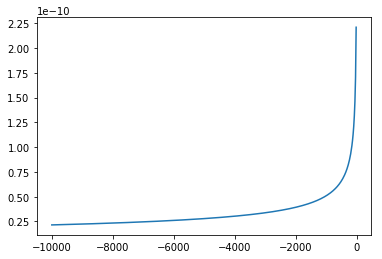

In [22]:
t = np.arange(-10000, t_LSO, 20)
# Compose plot for the angular frequency with respect to time
plt.figure(1)
plt.plot(t, omega(t))

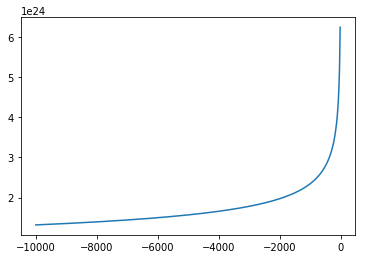

In [23]:
t = np.arange(-10000, t_LSO, 20)
i = 45 # line of sight angle
# We compose the plot for the plus polarization
plt.figure(1)
plt.plot(t, h_plus(i,t))

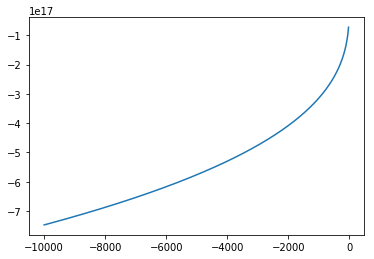

In [26]:
t = np.arange(-10000, t_LSO, 20)
i = 45 # line of sight angle
# We compose the plot for the cross polarization
plt.figure(1)
plt.plot(t, h_cross(i,t))

In [31]:
# Example I came up with as a test
# Above plots seem to be plotting omega(t) or something simlar to that and not h_plus/h_cross
def f(t):
    return omega(t)*np.cos(t)

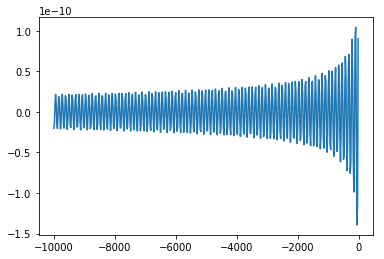

In [32]:
t = np.arange(-10000, t_LSO, 20)
# We compose the plot
plt.figure(1)
plt.plot(t, f(t)) # This worked perfectly
# This plot is how the other plots should look like more or less 
# This helped me figure out that what is wrong seem to be the way I defined 
# h_plus and h_cross by putting the function phi(t) inside cosine and sine, respectively
# However, I am not sure how to fix this problem
# I suppose the solution would be to find out how to insert an a function
# like phi(t) as an argument of a cosine and a sine